In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('HeartAttack.csv')
# Removing column 'group' as it is not required
df = df.drop(columns=['group'])
# Removing rows with any NaN values
df_cleaned = df.dropna()
print(df_cleaned.head(10))

   sub-type  Age  Gender    WBC   RBC   HGB    BA    EO    LY    MO  ...  \
0         2   28       1  10.90  5.09  15.3  0.06  0.19  2.77  0.96  ...   
1         2   40       0   5.96  5.16  15.6  0.03  0.37  2.36  0.43  ...   
2         2   64       1   4.59  5.51  14.9  0.05  0.05  1.12  0.27  ...   
3         2   57       0   7.26  4.70  12.5  0.05  0.11  3.46  0.70  ...   
4         2   58       0   7.15  4.37  12.1  0.03  0.34  1.90  0.47  ...   
5         2   47       1   8.40  4.55  13.4  0.05  0.11  3.60  0.70  ...   
6         2   59       0   4.65  4.99  13.9  0.02  0.10  1.85  0.35  ...   
7         2   63       0   5.59  4.23  11.8  0.01  0.12  1.47  0.37  ...   
8         2   45       1   5.90  5.28  15.0  0.01  0.10  2.40  0.60  ...   
9         2   37       0   8.58  4.57  13.7  0.04  0.12  1.90  0.67  ...   

     MPV  PLT   HCT   MCV  RDW-SD  RDW-CV   MCH  MCHC   PDW    PCT  
0  10.00  309  46.3  91.9    58.0    11.5  30.1  33.0  11.20  0.31  
1  13.30  214  45.9  89.0

In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sub-type  981 non-null    int64  
 1   Age       981 non-null    int64  
 2   Gender    981 non-null    int64  
 3   WBC       981 non-null    float64
 4   RBC       981 non-null    float64
 5   HGB       981 non-null    float64
 6   BA        981 non-null    float64
 7   EO        981 non-null    float64
 8   LY        981 non-null    float64
 9   MO        981 non-null    float64
 10  NEU       981 non-null    float64
 11  NEU/LY    981 non-null    float64
 12  PLT/LY    981 non-null    float64
 13  MPV/LY    981 non-null    float64
 14  LY/MO     981 non-null    float64
 15  MPV       981 non-null    float64
 16  PLT       981 non-null    int64  
 17  HCT       981 non-null    float64
 18  MCV       981 non-null    float64
 19  RDW-SD    981 non-null    float64
 20  RDW-CV    981 non-null    float6

# creating the correlation matrix and implementing the PCA in order to reduce the features count

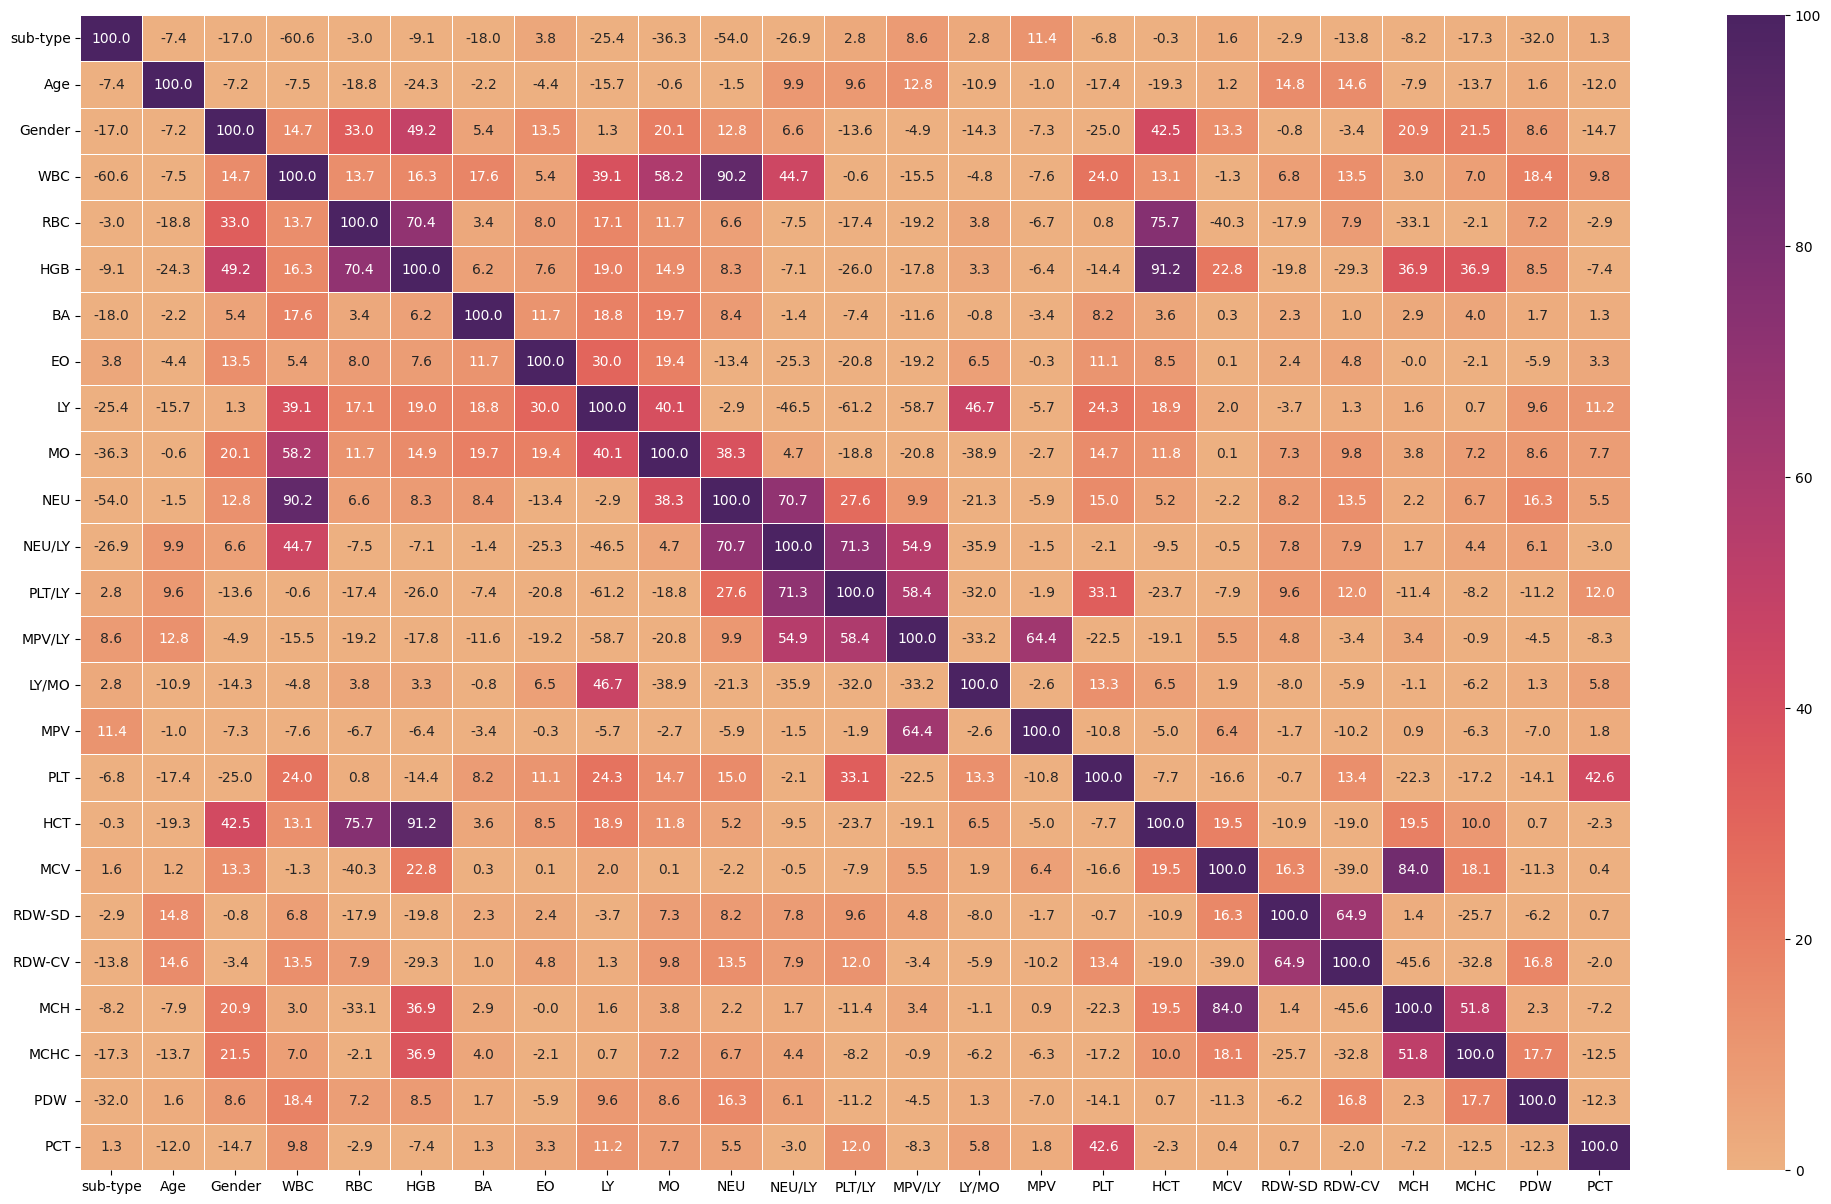

In [4]:

matrix = df_cleaned.corr() * 100

plt.figure(figsize=(25,15))
sns.heatmap(matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.show()

In [5]:
copy_columns = df_cleaned.columns[1:]
X = df_cleaned[copy_columns].copy()
y = df_cleaned['sub-type']


In [6]:
# Scale the data before PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_data_df

,Age,Gender,WBC,RBC,HGB,BA,EO,LY,MO,NEU,...,MPV,PLT,HCT,MCV,RDW-SD,RDW-CV,MCH,MCHC,PDW,PCT
0,-2.873600,0.852709,0.565289,0.612289,0.985156,0.060778,0.186459,0.237688,1.150782,0.174486,...,0.052867,0.692371,1.205635,0.923350,3.994687,-1.583841,0.458232,-0.280849,-0.785670,0.409944
1,-1.767169,-1.172733,-0.978413,0.740411,1.175517,-0.416210,1.459656,-0.111359,-0.881921,-1.039192,...,1.009640,-0.643229,1.113795,0.408502,-0.362630,-0.927032,0.500078,0.366685,2.904788,0.188412
2,0.445693,0.852709,-1.406524,1.381022,0.731341,-0.098218,-0.803806,-1.167015,-1.495567,-0.923101,...,0.342799,-0.938467,0.631635,-1.278070,-0.907295,-0.197244,-0.838980,0.366685,0.034432,-0.328497
3,-0.199725,-1.172733,-0.572175,-0.101535,-0.791548,-0.098218,-0.379407,0.825110,0.153607,-0.979387,...,0.052867,0.861079,-0.194926,-0.212867,1.023789,0.824460,-1.843274,-0.863630,-0.546473,0.483788
4,-0.107523,-1.172733,-0.606549,-0.705540,-1.045362,-0.416210,1.247457,-0.502973,-0.728509,-0.462255,...,-0.037011,-0.713524,-0.700047,0.053434,1.518939,1.043396,3.638495,-1.057890,-0.717328,-0.402341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,-1.490561,0.852709,0.312172,0.905140,1.175517,-0.416210,-0.379407,0.459035,-0.536745,0.237808,...,-0.382029,-0.010576,0.493875,-0.780975,-0.214085,0.094672,0.290850,1.726507,0.786192,-0.254653
977,-0.107523,0.852709,1.634005,1.069868,0.794795,0.855760,1.035257,0.714436,3.030073,1.191161,...,0.081860,-0.460463,0.585715,-0.124100,-0.907295,-0.416180,-0.378679,0.625699,-0.648986,-0.180809
978,0.261288,0.852709,0.171551,-0.906875,0.096804,-0.098218,-1.086739,-1.413902,-1.035332,0.927318,...,0.313805,-1.247764,-0.355646,1.029870,0.404852,-0.635117,1.504372,1.143726,-0.033910,-0.476185
979,-1.029548,-1.172733,0.749658,-1.291242,-0.728094,1.014756,-0.733073,0.901730,-0.114863,0.554420,...,-0.063105,0.692371,-0.748263,1.136390,-0.362630,-1.218947,0.834842,-0.093064,-1.161549,0.336100


In [7]:
# n_components can also be a percentage indicating the percentage of explained variance you want to capture
pca = PCA(n_components=0.85,random_state=42)
pca_data = pca.fit_transform(scaled_data)
pca_data

array([[ 1.87881236,  1.26246561, -0.19551629, ..., -1.23214976,
        -0.98394095, -1.20283573],
       [ 1.80007253, -1.04028044,  1.59500823, ..., -2.17739013,
        -0.88498747,  0.17870209],
       [-0.5824935 , -0.3179658 ,  1.64737027, ..., -0.26781428,
         0.58675463, -0.10373774],
       ...,
       [-2.31882486,  3.09010982,  3.26146279, ..., -0.36119146,
         0.41469584,  0.16252786],
       [ 0.23790249, -0.67324402,  0.09560597, ...,  0.50704371,
         0.92333382, -0.71113142],
       [-1.25478215, -1.5268964 ,  1.10860276, ...,  0.30894543,
        -0.29620616, -0.31716158]])

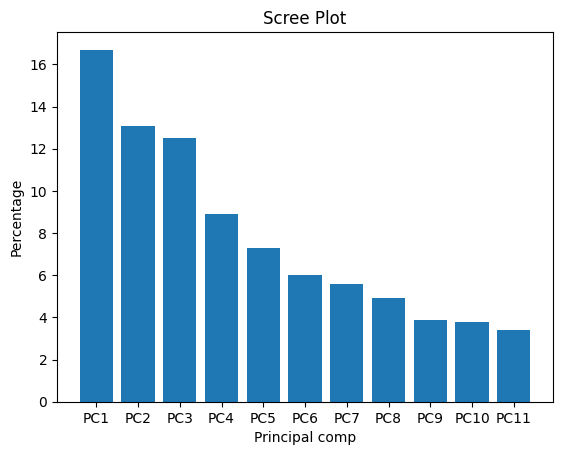

In [8]:
pca.explained_variance_ratio_

# Multiply explained by 100 and round
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]


plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

plt.ylabel('Percentage')

plt.xlabel('Principal comp')

plt.title('Scree Plot')

plt.show()

In [9]:
sum(pca.explained_variance_ratio_)

0.861288827273476

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [24] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [11] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [24] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[11]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


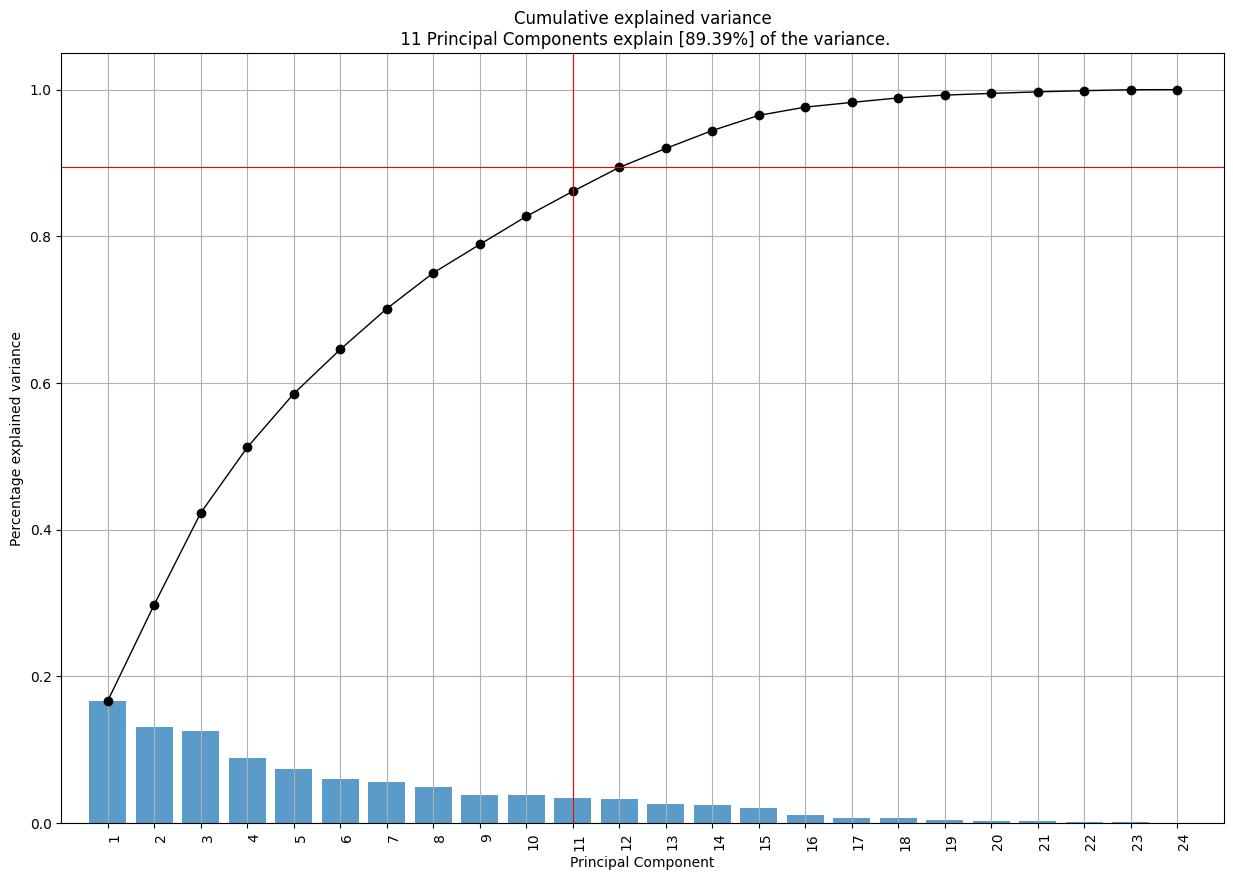

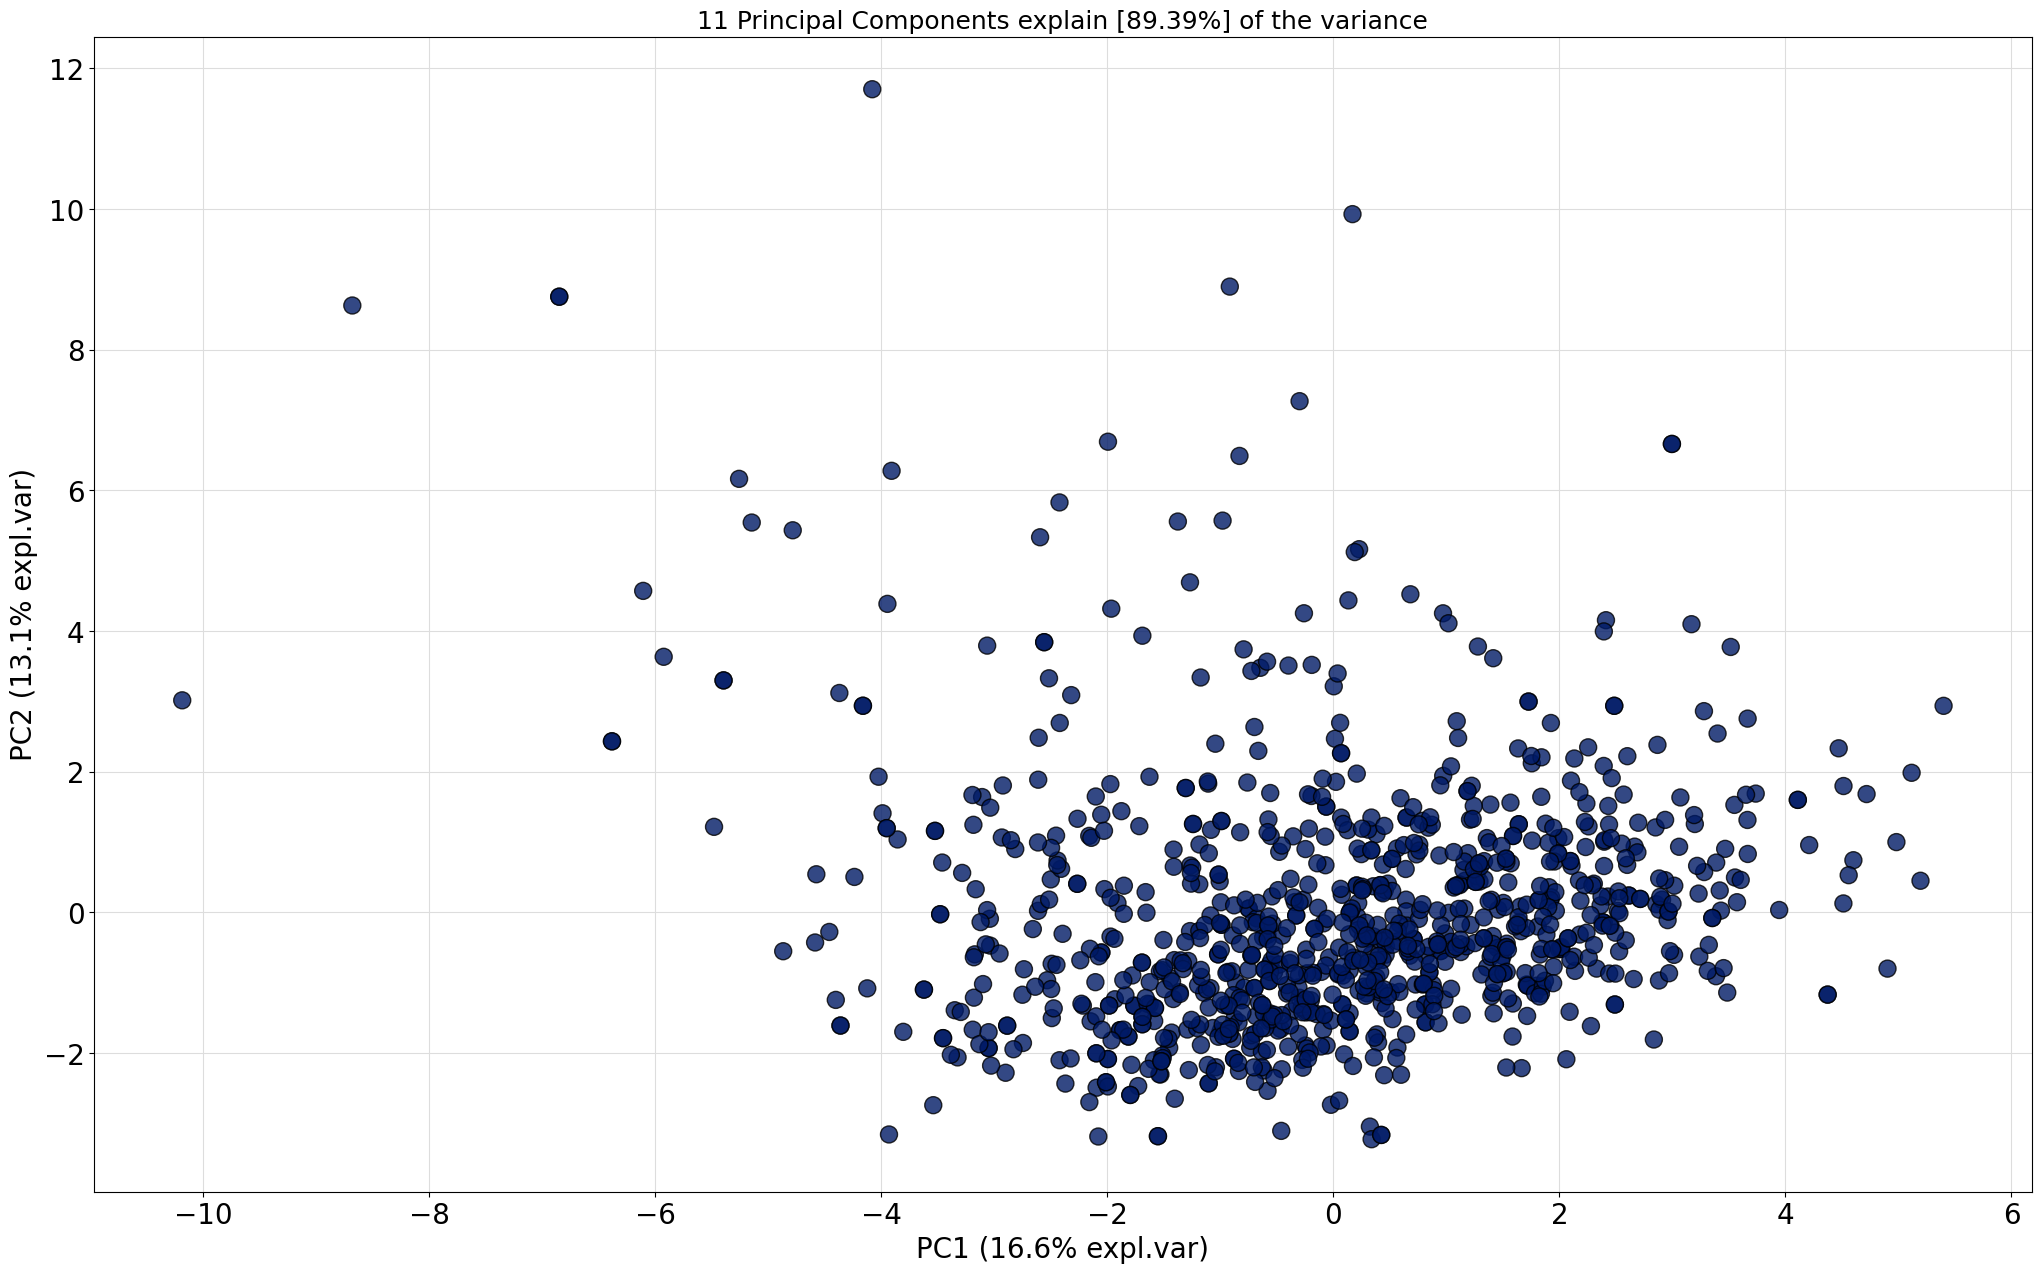

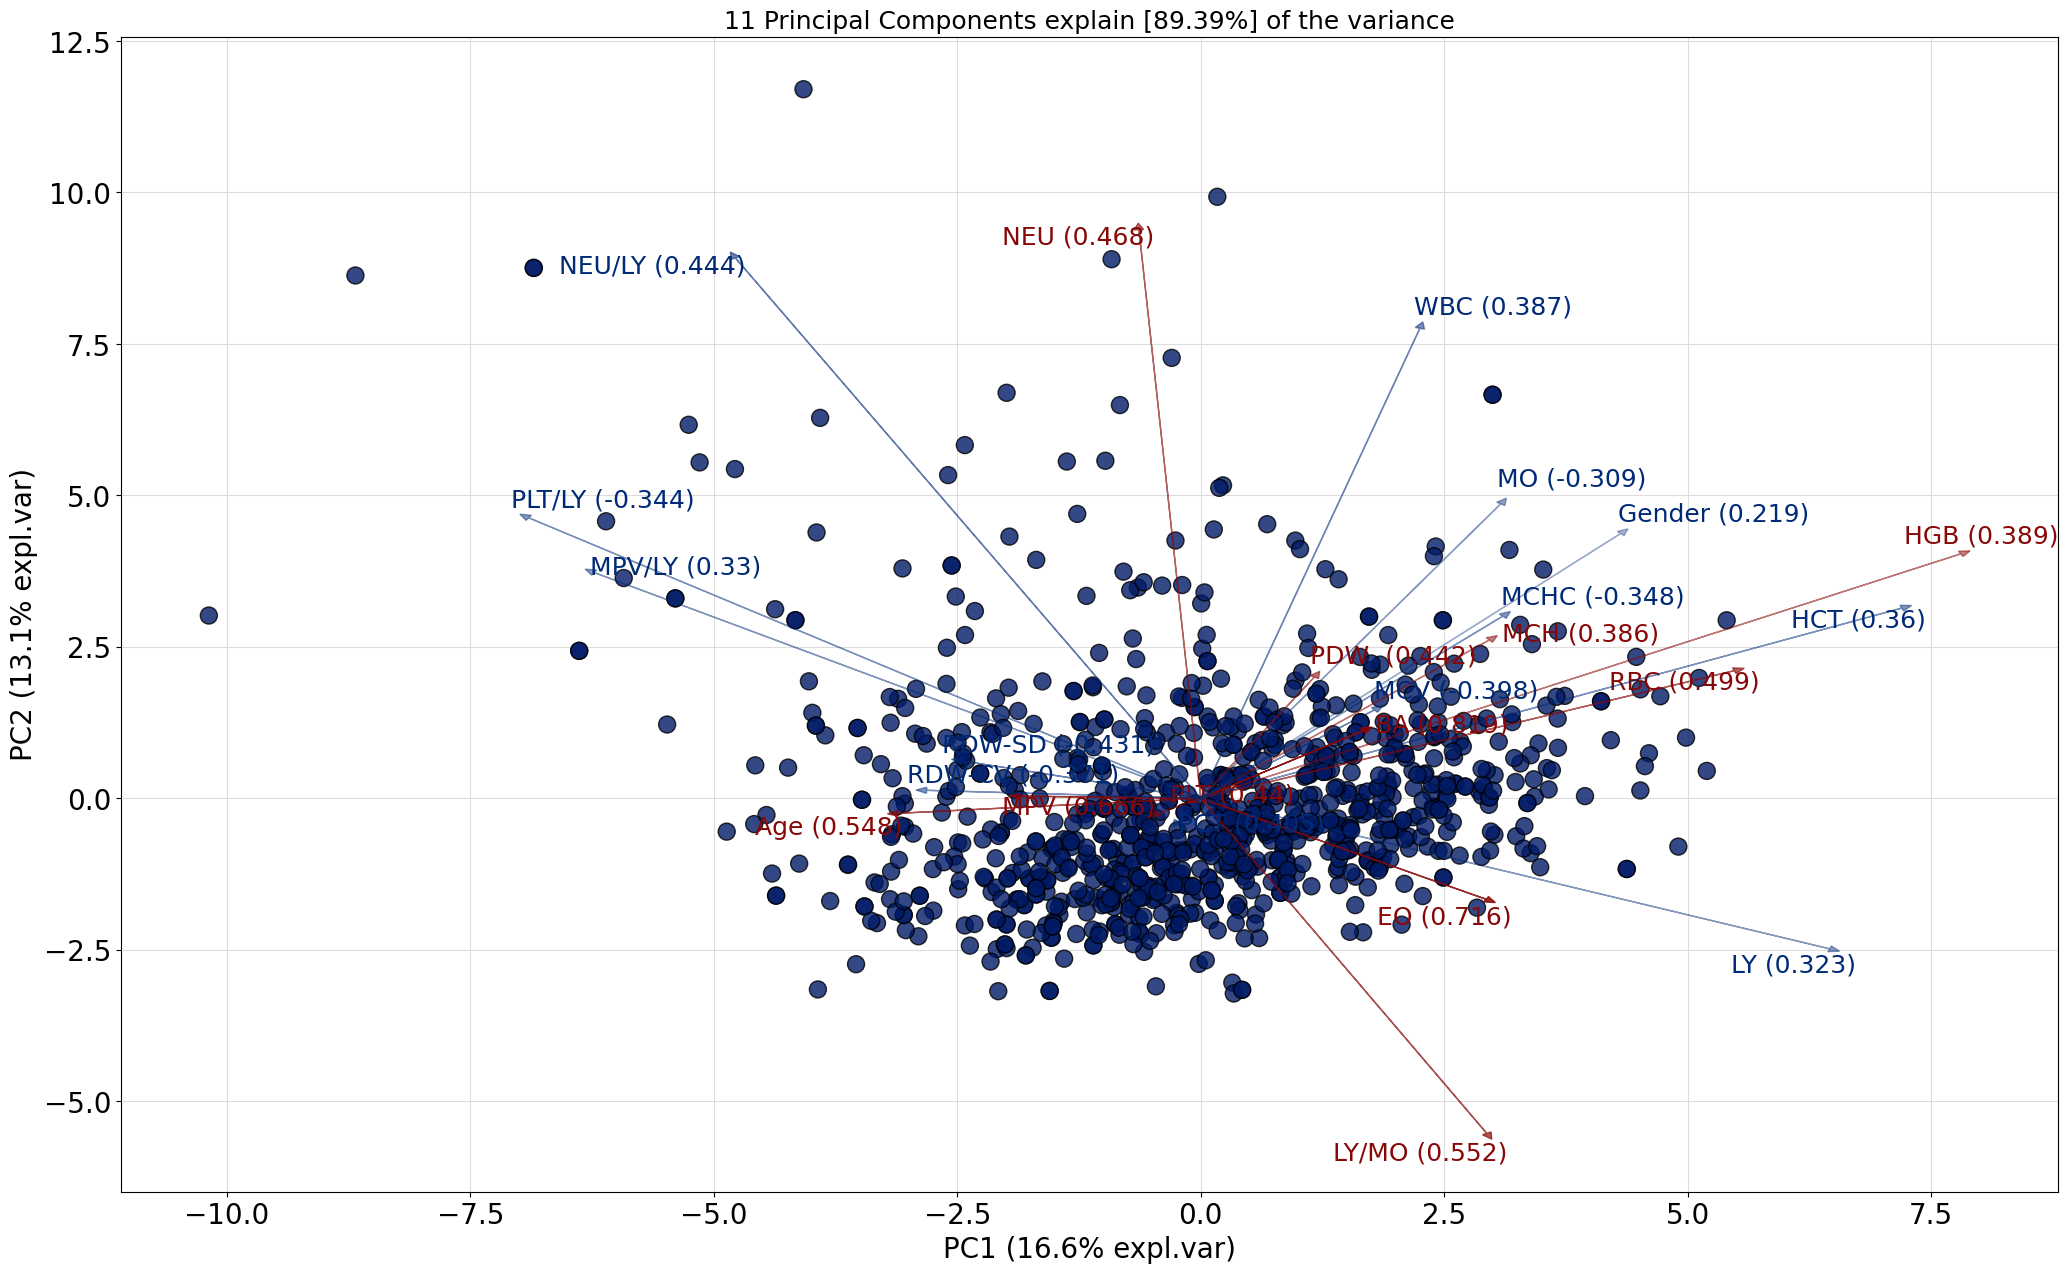

In [10]:
from pca import pca
#scaled_data_df = pd.DataFrame(scaled_data, columns=data.columns)
###########################################################
# COMPUTE AND VISUALIZE PCA
###########################################################
# Initialize the PCA
model = pca(n_components=0.85)

# Fit and transform
results = model.fit_transform(X=scaled_data_df)

# Plot the explained variance
fig, ax = model.plot()

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot()

In [11]:
pca_df = pd.DataFrame(pca_data, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.878812,1.262466,-0.195516,-0.833162,0.172783,-3.102098,-0.954263,0.233902,-1.232150,-0.983941,-1.202836
1,1.800073,-1.040280,1.595008,0.943560,0.523177,0.435807,0.882538,1.438984,-2.177390,-0.884987,0.178702
2,-0.582494,-0.317966,1.647370,3.572777,0.239799,0.340456,0.145956,-0.005258,-0.267814,0.586755,-0.103738
3,-0.615601,-2.246860,-1.988319,0.054678,0.069171,-0.796045,-0.121876,0.305761,0.206137,-0.249142,-0.881842
4,-1.142697,-1.143459,1.153539,-1.775222,-1.416274,-1.394322,-0.865355,0.328994,-0.663004,-0.250010,0.674821
...,...,...,...,...,...,...,...,...,...,...,...
976,2.223478,0.387819,0.128680,0.863519,0.356956,1.294772,-0.579741,0.866430,-1.393134,-0.613676,0.033922
977,2.601523,2.222001,-1.318976,-0.318585,-0.336266,-0.045751,1.846025,-1.695558,0.926157,-0.033310,0.066977
978,-2.318825,3.090110,3.261463,-0.260394,-0.283354,0.150760,-0.322202,0.579047,-0.361191,0.414696,0.162528
979,0.237902,-0.673244,0.095606,-2.856853,1.662890,0.301925,0.063032,0.407092,0.507044,0.923334,-0.711131


Accuracy: 0.6649746192893401
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50        37
           1       0.50      0.39      0.44        61
           2       0.75      0.92      0.82        99

    accuracy                           0.66       197
   macro avg       0.61      0.58      0.59       197
weighted avg       0.64      0.66      0.64       197



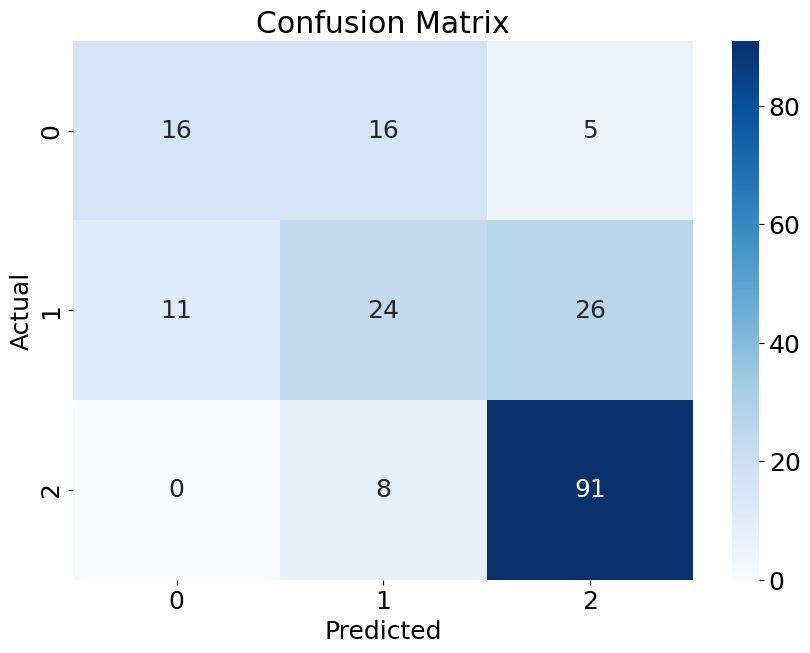

In [28]:
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Splitting the data into features and target
X_PCA = pca_df.copy()


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

# Creating the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
#plt.suptitle()
plt.show()


c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Pytho

Best Regularization Parameter (C): 1
Accuracy: 0.6649746192893401
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50        37
           1       0.50      0.39      0.44        61
           2       0.75      0.92      0.82        99

    accuracy                           0.66       197
   macro avg       0.61      0.58      0.59       197
weighted avg       0.64      0.66      0.64       197

Confusion Matrix:
 [[16 16  5]
 [11 24 26]
 [ 0  8 91]]


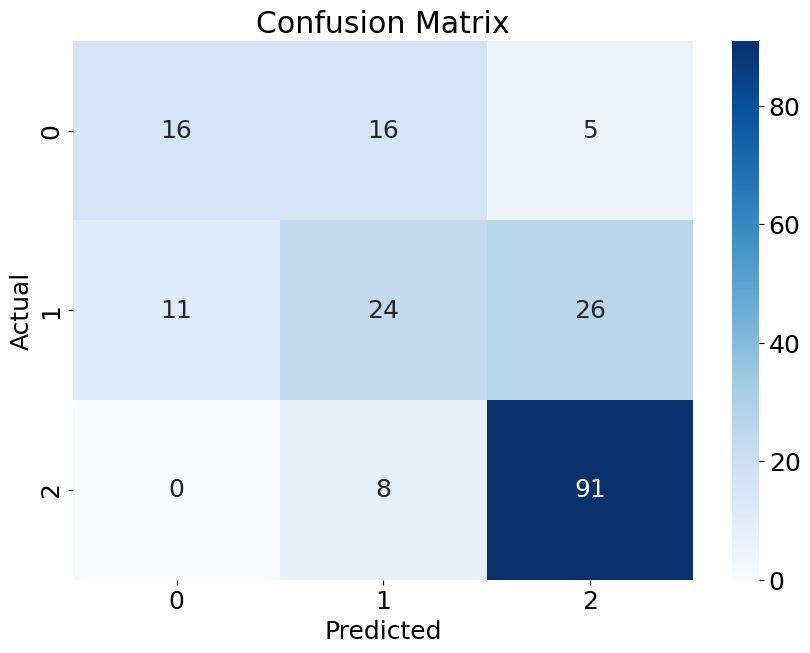

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

# Defining the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Defining the grid of values for the regularization parameter C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Performing grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best model
best_model = grid_search.best_estimator_

# Making predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Regularization Parameter (C):", grid_search.best_params_['C'])
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
#plt.suptitle()
plt.show()


# Implementing the Logistic regression and SVC with cross validation

c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\DIPU\AppData\Local\Programs\Python\Pytho

Average Logistic Regression Accuracy: 0.6758400329828902
Average SVM Accuracy: 0.6789115646258503


c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]


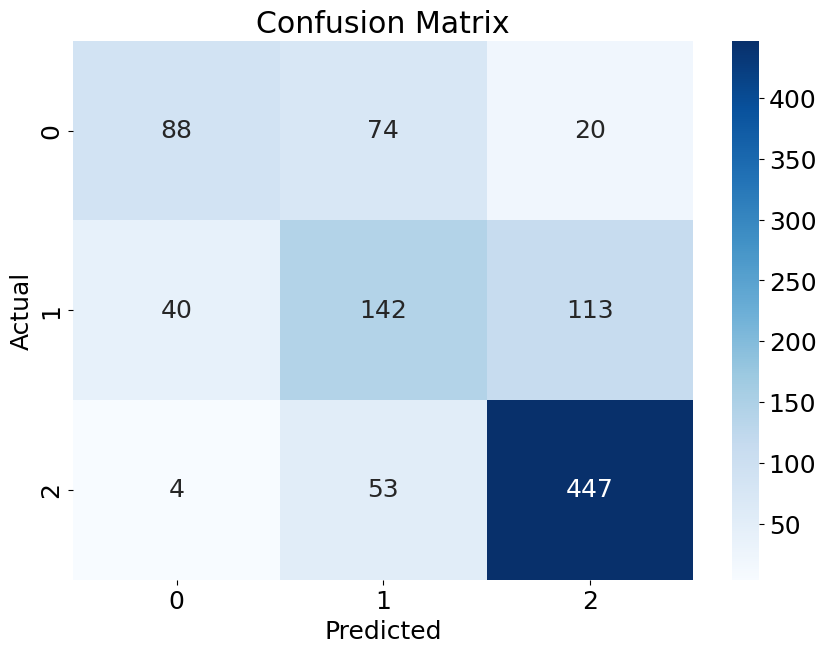

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       182
           1       0.55      0.51      0.53       295
           2       0.78      0.90      0.84       504

    accuracy                           0.70       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.69      0.70      0.69       981

SVM Confusion Matrix:
 [[ 84  77  21]
 [ 41 150 104]
 [  7  45 452]]


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 10
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Initialize the SVM model
svm_model = SVC(kernel='linear', probability=True)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svm_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    
    # SVM
    svm_model.fit(X_train, y_train)
    y_pred_svm = svm_model.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, y_pred_svm))

# Average accuracy across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svm_accuracy = np.mean(svm_accuracies)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVM Accuracy: {avg_svm_accuracy}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svm_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_pred_svm = svm_model.predict(X_PCA)

# Final evaluation
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
#plt.suptitle()
plt.show()

print("SVM Classification Report:\n", classification_report(y, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y, y_pred_svm))


In [15]:
print(logistic_accuracies)
print(svm_accuracies)

[0.6767676767676768, 0.7244897959183674, 0.7551020408163265, 0.5918367346938775, 0.5918367346938775, 0.7040816326530612, 0.6530612244897959, 0.7040816326530612, 0.6938775510204082, 0.6632653061224489]
[0.6666666666666666, 0.7346938775510204, 0.7244897959183674, 0.6224489795918368, 0.6224489795918368, 0.6836734693877551, 0.6428571428571429, 0.7244897959183674, 0.6938775510204082, 0.673469387755102]


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the logistic regression model without the deprecated parameter
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Initialize the SVM model using SVC
svc_model = SVC(kernel='linear', probability=True)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))

# Average accuracy across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)

# Final evaluation
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))

print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))


Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       182
           1       0.55      0.51      0.53       295
           2       0.78      0.90      0.84       504

    accuracy                           0.70       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.69      0.70      

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []
tree_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))
    
    # Decision Tree
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    tree_accuracies.append(accuracy_score(y_test, y_pred_tree))

# Average accuracy across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)
avg_tree_accuracy = np.mean(tree_accuracies)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")
print(f"Average Decision Tree Accuracy: {avg_tree_accuracy}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)

# Final evaluation
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))

print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))

print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))


Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Average Decision Tree Accuracy: 0.6482855070962394
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       182
           1       0.55      0.51      0.53       295
           2       0.78      0.90      0.84       504

    accuracy                           0.70       981
   macro avg       0.66      0.62      0.6

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []
tree_accuracies = []
forest_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))
    
    # Decision Tree
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    tree_accuracies.append(accuracy_score(y_test, y_pred_tree))
    
    # Random Forest
    forest_model.fit(X_train, y_train)
    y_pred_forest = forest_model.predict(X_test)
    forest_accuracies.append(accuracy_score(y_test, y_pred_forest))

# Average accuracy across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)
avg_tree_accuracy = np.mean(tree_accuracies)
avg_forest_accuracy = np.mean(forest_accuracies)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")
print(f"Average Decision Tree Accuracy: {avg_tree_accuracy}")
print(f"Average Random Forest Accuracy: {avg_forest_accuracy}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)
forest_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)
y_pred_forest = forest_model.predict(X_PCA)

# Final evaluation
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))

print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))

print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))

print("Random Forest Classification Report:\n", classification_report(y, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y, y_pred_forest))


Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Average Decision Tree Accuracy: 0.6482855070962394
Average Random Forest Accuracy: 0.7186366932559827
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       182
           1       0.55      0.51      0.53       295
           2       0.78      0.90      0.84       504

    accuracy                           0.70  

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []
tree_accuracies = []
forest_accuracies = []
xgb_accuracies = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))
    
    # Decision Tree
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    tree_accuracies.append(accuracy_score(y_test, y_pred_tree))
    
    # Random Forest
    forest_model.fit(X_train, y_train)
    y_pred_forest = forest_model.predict(X_test)
    forest_accuracies.append(accuracy_score(y_test, y_pred_forest))
    
    # XGBoost
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_accuracies.append(accuracy_score(y_test, y_pred_xgb))

# Average accuracy across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)
avg_tree_accuracy = np.mean(tree_accuracies)
avg_forest_accuracy = np.mean(forest_accuracies)
avg_xgb_accuracy = np.mean(xgb_accuracies)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")
print(f"Average Decision Tree Accuracy: {avg_tree_accuracy}")
print(f"Average Random Forest Accuracy: {avg_forest_accuracy}")
print(f"Average XGBoost Accuracy: {avg_xgb_accuracy}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)
forest_model.fit(X_PCA, y)
xgb_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)
y_pred_forest = forest_model.predict(X_PCA)
y_pred_xgb = xgb_model.predict(X_PCA)

# Final evaluation
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))

print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))

print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))

print("Random Forest Classification Report:\n", classification_report(y, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y, y_pred_forest))

print("XGBoost Classification Report:\n", classification_report(y, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y, y_pred_xgb))


c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Average Decision Tree Accuracy: 0.6482855070962394
Average Random Forest Accuracy: 0.7186366932559827
Average XGBoost Accuracy: 0.7135553713871335


c:\Users\DIPU\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.54       182
           1       0.55      0.51      0.53       295
           2       0.78      0.90      0.84       504

    accuracy                           0.70       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.69      0.70      0.69       981

SVC Confusion Matrix:
 [[ 84  77  21]
 [ 41 150 104]
 [  7  45 452]]
Decision Tre

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models with hyperparameters
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []
tree_accuracies = []
forest_accuracies = []
xgb_accuracies = []

logistic_aucs = []
svc_aucs = []
tree_aucs = []
forest_aucs = []
xgb_aucs = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    y_prob_logistic = logistic_model.predict_proba(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    logistic_aucs.append(roc_auc_score(y_test, y_prob_logistic, multi_class='ovr'))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    y_prob_svc = svc_model.predict_proba(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))
    svc_aucs.append(roc_auc_score(y_test, y_prob_svc, multi_class='ovr'))
    
    # Decision Tree
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    y_prob_tree = tree_model.predict_proba(X_test)
    tree_accuracies.append(accuracy_score(y_test, y_pred_tree))
    tree_aucs.append(roc_auc_score(y_test, y_prob_tree, multi_class='ovr'))
    
    # Random Forest
    forest_model.fit(X_train, y_train)
    y_pred_forest = forest_model.predict(X_test)
    y_prob_forest = forest_model.predict_proba(X_test)
    forest_accuracies.append(accuracy_score(y_test, y_pred_forest))
    forest_aucs.append(roc_auc_score(y_test, y_prob_forest, multi_class='ovr'))
    
    # XGBoost
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    y_prob_xgb = xgb_model.predict_proba(X_test)
    xgb_accuracies.append(accuracy_score(y_test, y_pred_xgb))
    xgb_aucs.append(roc_auc_score(y_test, y_prob_xgb, multi_class='ovr'))

# Average accuracy and AUC across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)
avg_tree_accuracy = np.mean(tree_accuracies)
avg_forest_accuracy = np.mean(forest_accuracies)
avg_xgb_accuracy = np.mean(xgb_accuracies)

avg_logistic_auc = np.mean(logistic_aucs)
avg_svc_auc = np.mean(svc_aucs)
avg_tree_auc = np.mean(tree_aucs)
avg_forest_auc = np.mean(forest_aucs)
avg_xgb_auc = np.mean(xgb_aucs)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")
print(f"Average Decision Tree Accuracy: {avg_tree_accuracy}")
print(f"Average Random Forest Accuracy: {avg_forest_accuracy}")
print(f"Average XGBoost Accuracy: {avg_xgb_accuracy}")

print(f"Average Logistic Regression AUC: {avg_logistic_auc}")
print(f"Average SVC AUC: {avg_svc_auc}")
print(f"Average Decision Tree AUC: {avg_tree_auc}")
print(f"Average Random Forest AUC: {avg_forest_auc}")
print(f"Average XGBoost AUC: {avg_xgb_auc}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)
forest_model.fit(X_PCA, y)
xgb_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_prob_logistic = logistic_model.predict_proba(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_prob_svc = svc_model.predict_proba(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)
y_prob_tree = tree_model.predict_proba(X_PCA)
y_pred_forest = forest_model.predict(X_PCA)
y_prob_forest = forest_model.predict_proba(X_PCA)
y_pred_xgb = xgb_model.predict(X_PCA)
y_prob_xgb = xgb_model.predict_proba(X_PCA)

# Final evaluation
print("\nLogistic Regression Hyperparameters:", logistic_model.get_params())
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))
print("Logistic Regression AUC:", roc_auc_score(y, y_prob_logistic, multi_class='ovr'))

print("\nSVC Hyperparameters:", svc_model.get_params())
print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))
print("SVC AUC:", roc_auc_score(y, y_prob_svc, multi_class='ovr'))

print("\nDecision Tree Hyperparameters:", tree_model.get_params())
print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))
print("Decision Tree AUC:", roc_auc_score(y, y_prob_tree, multi_class='ovr'))

print("\nRandom Forest Hyperparameters:", forest_model.get_params())
print("Random Forest Classification Report:\n", classification_report(y, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y, y_pred_forest))
print("Random Forest AUC:", roc_auc_score(y, y_prob_forest, multi_class='ovr'))

print("\nXGBoost Hyperparameters:", xgb_model.get_params())
print("XGBoost Classification Report:\n", classification_report(y, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y, y_prob_xgb, multi_class='ovr'))


Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Average Decision Tree Accuracy: 0.6482855070962394
Average Random Forest Accuracy: 0.7186366932559827
Average XGBoost Accuracy: 0.7135553713871335
Average Logistic Regression AUC: 0.8341880349158709
Average SVC AUC: 0.8395555248480318
Average Decision Tree AUC: 0.7131194848226098
Average Random Forest AUC: 0.8690917468395318
Average XGBoost AUC: 0.8750377683945494

Logistic Regression Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
       

Average Logistic Regression Accuracy: 0.6778514451465866
Average SVC Accuracy: 0.678861493836113
Average Decision Tree Accuracy: 0.6482855070962394
Average Random Forest Accuracy: 0.7186366932559827
Average XGBoost Accuracy: 0.7135553713871335
Average Logistic Regression AUC: 0.8341880349158709
Average SVC AUC: 0.8401931228940569
Average Decision Tree AUC: 0.7131194848226098
Average Random Forest AUC: 0.8690917468395318
Average XGBoost AUC: 0.8750377683945494

Logistic Regression Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
       

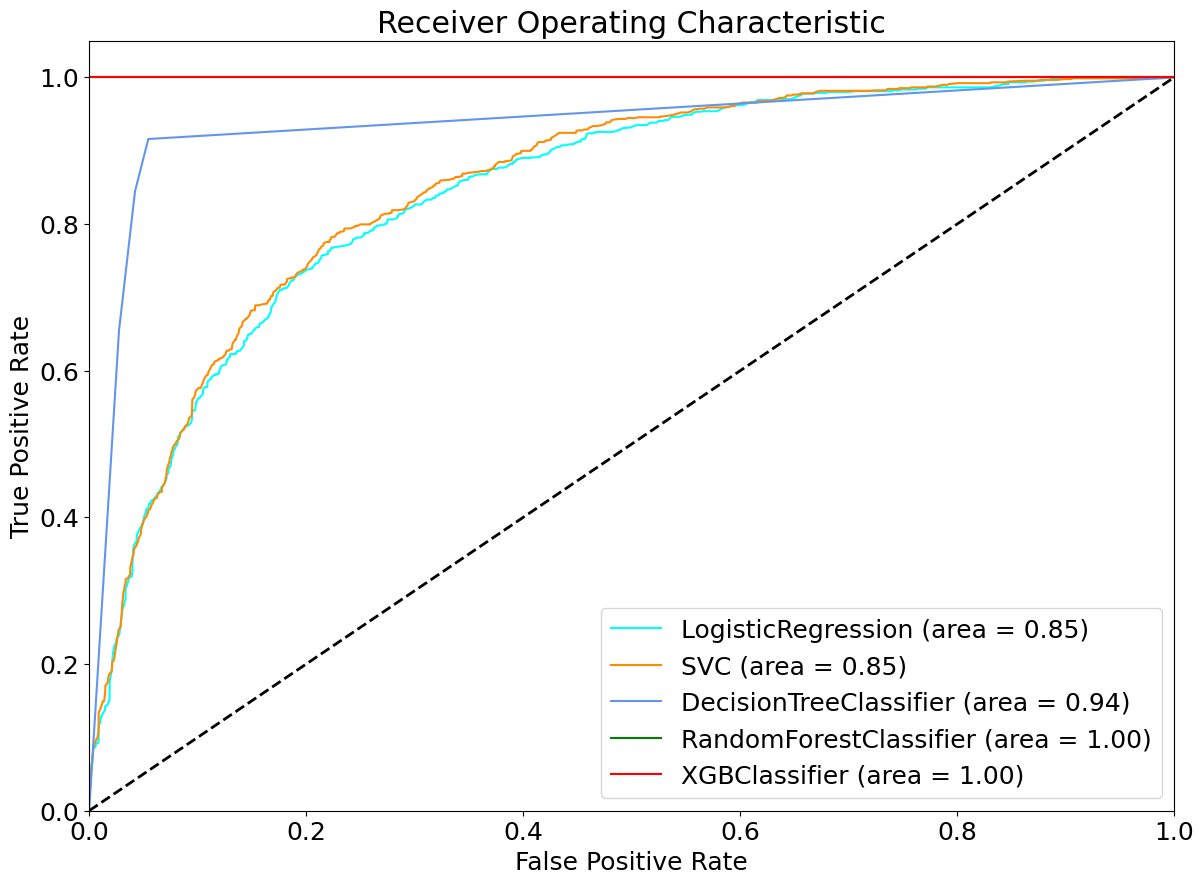

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
from itertools import cycle

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models with hyperparameters
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Lists to store evaluation metrics for each fold
logistic_accuracies = []
svc_accuracies = []
tree_accuracies = []
forest_accuracies = []
xgb_accuracies = []

logistic_aucs = []
svc_aucs = []
tree_aucs = []
forest_aucs = []
xgb_aucs = []

# Perform k-fold cross-validation
for train_index, test_index in skf.split(X_PCA, y):
    X_train, X_test = X_PCA.iloc[train_index], X_PCA.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Logistic Regression
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    y_prob_logistic = logistic_model.predict_proba(X_test)
    logistic_accuracies.append(accuracy_score(y_test, y_pred_logistic))
    logistic_aucs.append(roc_auc_score(y_test, y_prob_logistic, multi_class='ovr'))
    
    # SVC
    svc_model.fit(X_train, y_train)
    y_pred_svc = svc_model.predict(X_test)
    y_prob_svc = svc_model.predict_proba(X_test)
    svc_accuracies.append(accuracy_score(y_test, y_pred_svc))
    svc_aucs.append(roc_auc_score(y_test, y_prob_svc, multi_class='ovr'))
    
    # Decision Tree
    tree_model.fit(X_train, y_train)
    y_pred_tree = tree_model.predict(X_test)
    y_prob_tree = tree_model.predict_proba(X_test)
    tree_accuracies.append(accuracy_score(y_test, y_pred_tree))
    tree_aucs.append(roc_auc_score(y_test, y_prob_tree, multi_class='ovr'))
    
    # Random Forest
    forest_model.fit(X_train, y_train)
    y_pred_forest = forest_model.predict(X_test)
    y_prob_forest = forest_model.predict_proba(X_test)
    forest_accuracies.append(accuracy_score(y_test, y_pred_forest))
    forest_aucs.append(roc_auc_score(y_test, y_prob_forest, multi_class='ovr'))
    
    # XGBoost
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    y_prob_xgb = xgb_model.predict_proba(X_test)
    xgb_accuracies.append(accuracy_score(y_test, y_pred_xgb))
    xgb_aucs.append(roc_auc_score(y_test, y_prob_xgb, multi_class='ovr'))

# Average accuracy and AUC across all folds
avg_logistic_accuracy = np.mean(logistic_accuracies)
avg_svc_accuracy = np.mean(svc_accuracies)
avg_tree_accuracy = np.mean(tree_accuracies)
avg_forest_accuracy = np.mean(forest_accuracies)
avg_xgb_accuracy = np.mean(xgb_accuracies)

avg_logistic_auc = np.mean(logistic_aucs)
avg_svc_auc = np.mean(svc_aucs)
avg_tree_auc = np.mean(tree_aucs)
avg_forest_auc = np.mean(forest_aucs)
avg_xgb_auc = np.mean(xgb_aucs)

print(f"Average Logistic Regression Accuracy: {avg_logistic_accuracy}")
print(f"Average SVC Accuracy: {avg_svc_accuracy}")
print(f"Average Decision Tree Accuracy: {avg_tree_accuracy}")
print(f"Average Random Forest Accuracy: {avg_forest_accuracy}")
print(f"Average XGBoost Accuracy: {avg_xgb_accuracy}")

print(f"Average Logistic Regression AUC: {avg_logistic_auc}")
print(f"Average SVC AUC: {avg_svc_auc}")
print(f"Average Decision Tree AUC: {avg_tree_auc}")
print(f"Average Random Forest AUC: {avg_forest_auc}")
print(f"Average XGBoost AUC: {avg_xgb_auc}")

# Fit the models on the entire dataset and get final evaluation metrics
logistic_model.fit(X_PCA, y)




























forest_model.fit(X_PCA, y)
xgb_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_prob_logistic = logistic_model.predict_proba(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_prob_svc = svc_model.predict_proba(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)
y_prob_tree = tree_model.predict_proba(X_PCA)
y_pred_forest = forest_model.predict(X_PCA)
y_prob_forest = forest_model.predict_proba(X_PCA)
y_pred_xgb = xgb_model.predict(X_PCA)
y_prob_xgb = xgb_model.predict_proba(X_PCA)

# Final evaluation
print("\nLogistic Regression Hyperparameters:", logistic_model.get_params())
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))
print("Logistic Regression AUC:", roc_auc_score(y, y_prob_logistic, multi_class='ovr'))

print("\nSVC Hyperparameters:", svc_model.get_params())
print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))
print("SVC AUC:", roc_auc_score(y, y_prob_svc, multi_class='ovr'))

print("\nDecision Tree Hyperparameters:", tree_model.get_params())
print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))
print("Decision Tree AUC:", roc_auc_score(y, y_prob_tree, multi_class='ovr'))

print("\nRandom Forest Hyperparameters:", forest_model.get_params())
print("Random Forest Classification Report:\n", classification_report(y, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y, y_pred_forest))
print("Random Forest AUC:", roc_auc_score(y, y_prob_forest, multi_class='ovr'))

print("\nXGBoost Hyperparameters:", xgb_model.get_params())
print("XGBoost Classification Report:\n", classification_report(y, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y, y_prob_xgb, multi_class='ovr'))

# Plotting AUC
def plot_roc_curve(models, X, y):
    plt.figure(figsize=(14, 10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    
    for model, color in zip(models, colors):
        y_prob = model.predict_proba(X)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y.shape[1])]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(y.shape[1]):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= y.shape[1]
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        plt.plot(fpr["macro"], tpr["macro"], color=color,
                 label=f'{model.__class__.__name__} (area = {roc_auc["macro"]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# One-hot encode the labels
y_one_hot = pd.get_dummies(y).values

# Plot ROC curves for all models
plot_roc_curve([logistic_model, svc_model, tree_model, forest_model, xgb_model], X_PCA, y_one_hot)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
from itertools import cycle

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models with hyperparameters
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the models on the entire dataset
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)
forest_model.fit(X_PCA, y)
xgb_model.fit(X_PCA, y)

# Predict probabilities
y_prob_logistic = logistic_model.predict_proba(X_PCA)
y_prob_svc = svc_model.predict_proba(X_PCA)
y_prob_tree = tree_model.predict_proba(X_PCA)
y_prob_forest = forest_model.predict_proba(X_PCA)
y_prob_xgb = xgb_model.predict_proba(X_PCA)

# One-hot encode the labels
y_one_hot = pd.get_dummies(y).values

# Plotting AUC
def plot_roc_curve(models, model_probs, X, y):
    plt.figure(figsize=(14, 10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    
    for model, y_prob, color in zip(models, model_probs, colors):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y.shape[1])]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(y.shape[1]):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= y.shape[1]
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        plt.plot(fpr["macro"], tpr["macro"], color=color,
                 label=f'{model.__class__.__name__} (area = {roc_auc["macro"]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for all models
plot_roc_curve(
    [logistic_model, svc_model, tree_model, forest_model, xgb_model],
    [y_prob_logistic, y_prob_svc, y_prob_tree, y_prob_forest, y_prob_xgb],
    X_PCA, y_one_hot
)



Logistic Regression Hyperparameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       182
           1       0.53      0.48      0.50       295
           2       0.77      0.89      0.82       504

    accuracy                           0.69       981
   macro avg       0.66      0.62      0.63       981
weighted avg       0.68      0.69      0.68       981

Logistic Regression Confusion Matrix:
 [[ 88  74  20]
 [ 40 142 113]
 [  4  53 447]]
Logistic Regression AUC: 0.8448641899211916

SVC Hyperparameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_funct

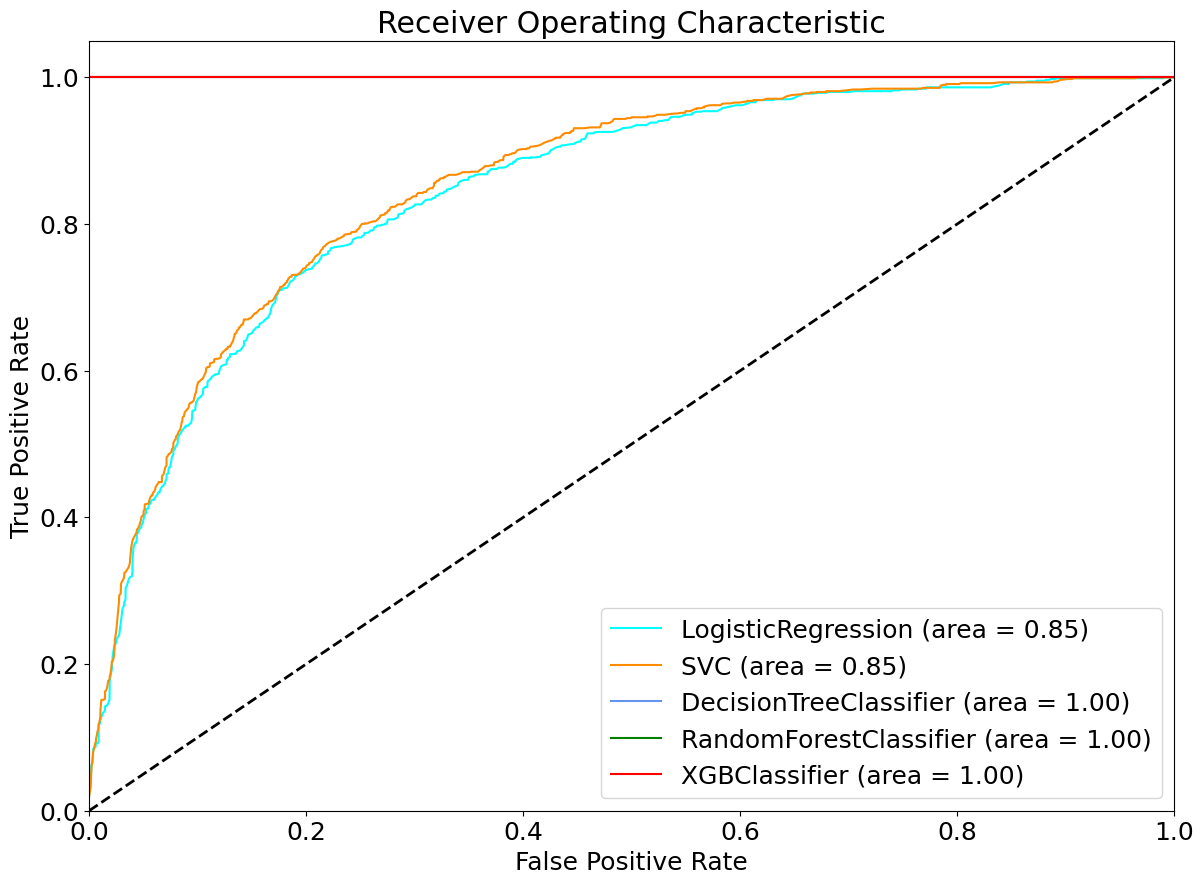

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import warnings
from itertools import cycle

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Assuming pca_df is your PCA-transformed data and y is your target variable

# Copying the PCA-transformed data
X_PCA = pca_df.copy()

# Define the k-fold cross-validation strategy
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the models with hyperparameters
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
svc_model = SVC(kernel='linear', probability=True)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Fit the models on the entire dataset
logistic_model.fit(X_PCA, y)
svc_model.fit(X_PCA, y)
tree_model.fit(X_PCA, y)
forest_model.fit(X_PCA, y)
xgb_model.fit(X_PCA, y)

y_pred_logistic = logistic_model.predict(X_PCA)
y_prob_logistic = logistic_model.predict_proba(X_PCA)
y_pred_svc = svc_model.predict(X_PCA)
y_prob_svc = svc_model.predict_proba(X_PCA)
y_pred_tree = tree_model.predict(X_PCA)
y_prob_tree = tree_model.predict_proba(X_PCA)
y_pred_forest = forest_model.predict(X_PCA)
y_prob_forest = forest_model.predict_proba(X_PCA)
y_pred_xgb = xgb_model.predict(X_PCA)
y_prob_xgb = xgb_model.predict_proba(X_PCA)

# Final evaluation
print("\nLogistic Regression Hyperparameters:", logistic_model.get_params())
print("Logistic Regression Classification Report:\n", classification_report(y, y_pred_logistic))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y, y_pred_logistic))
print("Logistic Regression AUC:", roc_auc_score(y, y_prob_logistic, multi_class='ovr'))

print("\nSVC Hyperparameters:", svc_model.get_params())
print("SVC Classification Report:\n", classification_report(y, y_pred_svc))
print("SVC Confusion Matrix:\n", confusion_matrix(y, y_pred_svc))
print("SVC AUC:", roc_auc_score(y, y_prob_svc, multi_class='ovr'))

print("\nDecision Tree Hyperparameters:", tree_model.get_params())
print("Decision Tree Classification Report:\n", classification_report(y, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y, y_pred_tree))
print("Decision Tree AUC:", roc_auc_score(y, y_prob_tree, multi_class='ovr'))

print("\nRandom Forest Hyperparameters:", forest_model.get_params())
print("Random Forest Classification Report:\n", classification_report(y, y_pred_forest))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y, y_pred_forest))
print("Random Forest AUC:", roc_auc_score(y, y_prob_forest, multi_class='ovr'))

print("\nXGBoost Hyperparameters:", xgb_model.get_params())
print("XGBoost Classification Report:\n", classification_report(y, y_pred_xgb))
print("XGBoost Confusion Matrix:\n", confusion_matrix(y, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y, y_prob_xgb, multi_class='ovr'))

# Plotting AUC
def plot_roc_curve(models, model_probs, X, y):
    plt.figure(figsize=(14, 10))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    
    for model, y_prob, color in zip(models, model_probs, colors):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(y.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(y.shape[1])]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(y.shape[1]):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= y.shape[1]
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
        plt.plot(fpr["macro"], tpr["macro"], color=color,
                 label=f'{model.__class__.__name__} (area = {roc_auc["macro"]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# One-hot encode the labels
y_one_hot = pd.get_dummies(y).values

# Plot ROC curves for all models
plot_roc_curve(
    [logistic_model, svc_model, tree_model, forest_model, xgb_model],
    [y_prob_logistic, y_prob_svc, y_prob_tree, y_prob_forest, y_prob_xgb],
    X_PCA, y_one_hot
)


   group  sub-type  Age  Gender    WBC   RBC   HGB    BA    EO    LY  ...  \
0      0         2   28       1  10.90  5.09  15.3  0.06  0.19  2.77  ...   
1      0         2   40       0   5.96  5.16  15.6  0.03  0.37  2.36  ...   
2      0         2   64       1   4.59  5.51  14.9  0.05  0.05  1.12  ...   
3      0         2   57       0   7.26  4.70  12.5  0.05  0.11  3.46  ...   
4      0         2   58       0   7.15  4.37  12.1  0.03  0.34  1.90  ...   

     MPV  PLT   HCT   MCV  RDW-SD  RDW-CV   MCH  MCHC  PDW    PCT  
0  10.00  309  46.3  91.9    58.0    11.5  30.1  33.0  11.2  0.31  
1  13.30  214  45.9  89.0    40.4    12.4  30.2  34.0  22.0  0.28  
2  11.00  193  43.8  79.5    38.2    13.4  27.0  34.0  13.6  0.21  
3  10.00  321  40.2  85.5    46.0    14.8  24.6  32.1  11.9  0.32  
4   9.69  209  38.0  87.0    48.0    15.1  37.7  31.8  11.4  0.20  

[5 rows x 26 columns]
Accuracy: 0.7106598984771574
Classification Report:
               precision    recall  f1-score   support

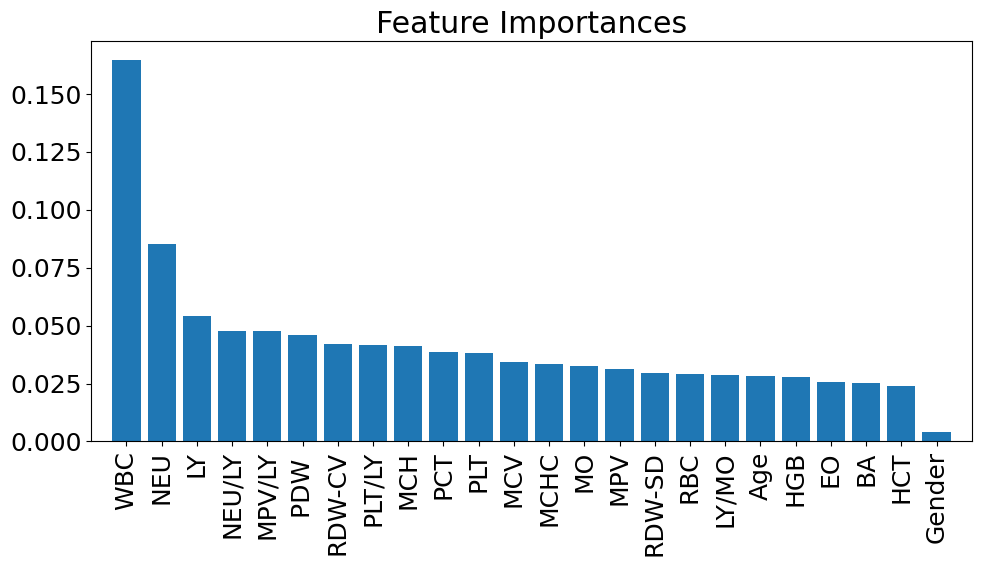

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = 'HeartAttack.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Basic data preprocessing
df = df.dropna()  # Drop rows with missing values for simplicity
df = df.drop(columns=['group'])
# Assuming 'target' is the response variable
X = df.drop(columns=['sub-type'])
y = df['sub-type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


   group  sub-type  Age  Gender    WBC   RBC   HGB    BA    EO    LY  ...  \
0      0         2   28       1  10.90  5.09  15.3  0.06  0.19  2.77  ...   
1      0         2   40       0   5.96  5.16  15.6  0.03  0.37  2.36  ...   
2      0         2   64       1   4.59  5.51  14.9  0.05  0.05  1.12  ...   
3      0         2   57       0   7.26  4.70  12.5  0.05  0.11  3.46  ...   
4      0         2   58       0   7.15  4.37  12.1  0.03  0.34  1.90  ...   

     MPV  PLT   HCT   MCV  RDW-SD  RDW-CV   MCH  MCHC  PDW    PCT  
0  10.00  309  46.3  91.9    58.0    11.5  30.1  33.0  11.2  0.31  
1  13.30  214  45.9  89.0    40.4    12.4  30.2  34.0  22.0  0.28  
2  11.00  193  43.8  79.5    38.2    13.4  27.0  34.0  13.6  0.21  
3  10.00  321  40.2  85.5    46.0    14.8  24.6  32.1  11.9  0.32  
4   9.69  209  38.0  87.0    48.0    15.1  37.7  31.8  11.4  0.20  

[5 rows x 26 columns]

XGBoost Accuracy: 0.7309644670050761
XGBoost Classification Report:
               precision    recall  f

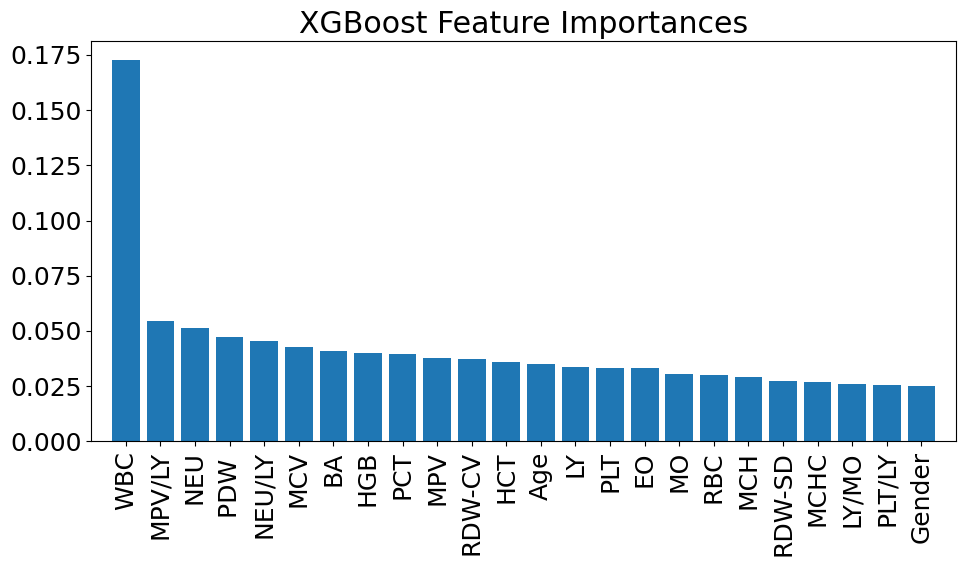


LightGBM Feature ranking:
1. feature 2 (717) - WBC
2. feature 22 (576) - PDW 
3. feature 9 (532) - NEU
4. feature 15 (492) - PLT
5. feature 17 (472) - MCV
6. feature 0 (467) - Age
7. feature 19 (414) - RDW-CV
8. feature 13 (412) - LY/MO
9. feature 11 (378) - PLT/LY
10. feature 3 (369) - RBC
11. feature 18 (368) - RDW-SD
12. feature 10 (357) - NEU/LY
13. feature 20 (347) - MCH
14. feature 21 (344) - MCHC
15. feature 16 (319) - HCT
16. feature 7 (315) - LY
17. feature 14 (312) - MPV
18. feature 12 (301) - MPV/LY
19. feature 8 (297) - MO
20. feature 5 (288) - BA
21. feature 6 (277) - EO
22. feature 4 (275) - HGB
23. feature 23 (262) - PCT
24. feature 1 (53) - Gender


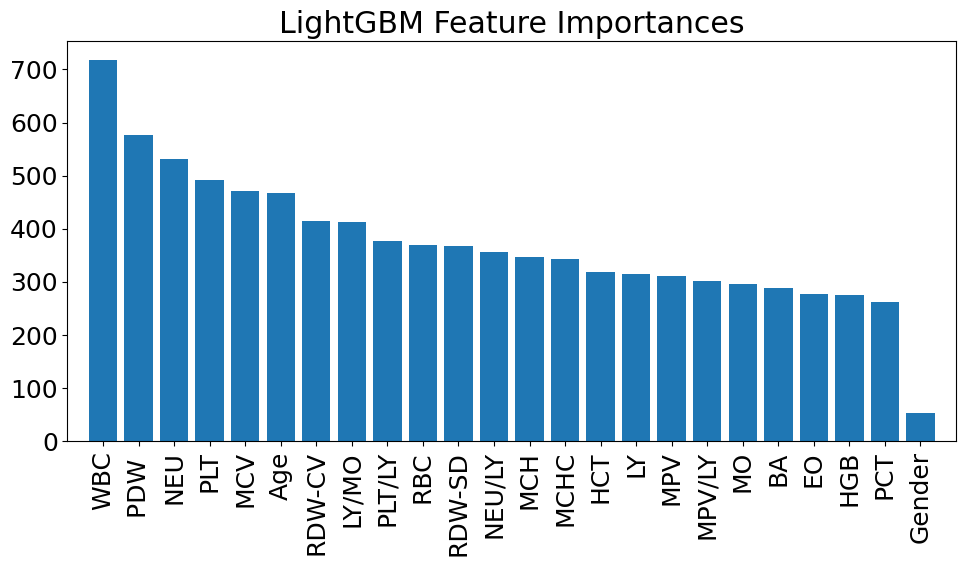

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'HeartAttack.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Basic data preprocessing
df = df.dropna()  # Drop rows with missing values for simplicity
df = df.drop(columns=['group'])
# Assuming 'target' is the response variable
X = df.drop(columns=['sub-type'])
y = df['sub-type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# Train and evaluate each model
models = [('XGBoost', xgb_model), ('LightGBM', lgbm_model), ('AdaBoost', ab_model)]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\n{name} Accuracy: {accuracy}")
    print(f"{name} Classification Report:\n", report)
    print(f"{name} Confusion Matrix:\n", conf_matrix)

# Plot feature importances for XGBoost and LightGBM
for name, model in models[:2]:  # Only XGBoost and LightGBM have feature_importances_ attribute
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print(f"\n{name} Feature ranking:")
    for f in range(X.shape[1]):
        print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {X.columns[indices[f]]}")
    
    # Plot the feature importances
    plt.figure(figsize=(10, 6))
    plt.title(f"{name} Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()
